In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.2.0


In [2]:
# Google Drive 에 저장되어 있는 diabetes,csv 파일을 읽어들이기 위해서
# Colab 의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
# 마운트된 Google Drive 의 working directory 이동

import os

working_dir = 'tensorflow_2.x_working_dir'

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(working_dir):
        os.mkdir(working_dir)

    os.chdir(working_dir)  # change working dir
    print('current dir = ', os.getcwd())

except Exception as err:
    
    os.chdir(original_dir)
    print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


In [4]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print("x_data.shape = ", x_data.shape)
    print("t_data.shape = ", t_data.shape)

except Exception as err:

    print(str(err))

x_data.shape =  (759, 8)
t_data.shape =  (759, 1)


In [5]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Dense(10, input_shape=(x_data.shape[1], ),activation='sigmoid'))  # 노드 1개인 출력층 생성

model.add(Dense(t_data.shape[1], activation='sigmoid'))

In [6]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [7]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
19/19 - 0s - loss: 0.7578 - accuracy: 0.3443 - val_loss: 0.7287 - val_accuracy: 0.3553
Epoch 2/500
19/19 - 0s - loss: 0.7090 - accuracy: 0.3657 - val_loss: 0.6908 - val_accuracy: 0.4408
Epoch 3/500
19/19 - 0s - loss: 0.6768 - accuracy: 0.6096 - val_loss: 0.6661 - val_accuracy: 0.6974
Epoch 4/500
19/19 - 0s - loss: 0.6555 - accuracy: 0.7298 - val_loss: 0.6500 - val_accuracy: 0.7632
Epoch 5/500
19/19 - 0s - loss: 0.6414 - accuracy: 0.7414 - val_loss: 0.6392 - val_accuracy: 0.6842
Epoch 6/500
19/19 - 0s - loss: 0.6318 - accuracy: 0.6870 - val_loss: 0.6321 - val_accuracy: 0.6579
Epoch 7/500
19/19 - 0s - loss: 0.6253 - accuracy: 0.6623 - val_loss: 0.6275 - val_accuracy: 0.6447
Epoch 8/500
19/19 - 0s - loss: 0.6210 - accuracy: 0.6573 - val_loss: 0.6243 - val_accuracy: 0.6447
Epoch 9/500
19/19 - 0s - loss: 0.6181 - accuracy: 0.6557 - val_loss: 0.6222 - val_accuracy: 0.6447
Epoch 10/500
19/19 - 0s - loss: 0.6160 - accuracy: 0.6557 - val_loss: 0.6208 - val_accuracy: 0.6447
Epoch 11/

In [8]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7721


[0.4876849055290222, 0.7720685005187988]

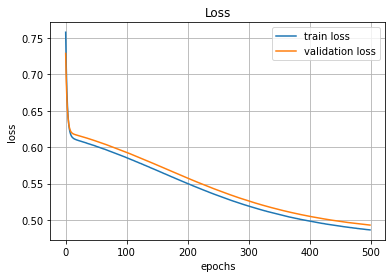

In [9]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

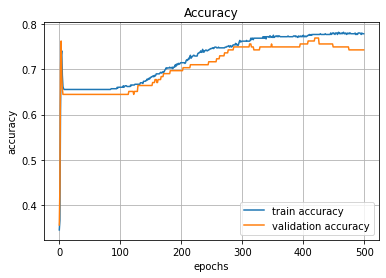

In [10]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [11]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 10) dtype=float32, numpy=
 array([[-0.20250374, -0.5239552 ,  0.14262702,  0.3788673 , -0.5010909 ,
          0.28704017,  0.4728745 , -0.49075234, -0.60301423,  0.1145354 ],
        [ 0.21994552, -1.5051217 ,  0.7130431 , -0.537884  ,  0.00525279,
          0.46657234,  1.266939  , -0.6107028 , -1.3300745 ,  1.3699714 ],
        [ 0.07364   ,  0.33136407, -0.22841156, -0.61378723, -0.06316781,
          0.365674  , -0.07764264, -0.5802065 ,  0.35433793,  0.67612314],
        [-0.4262057 , -0.66990227,  0.3169631 , -0.37614205, -0.26216373,
          0.56696594,  0.51729304, -0.19185494, -0.16585484, -0.1844406 ],
        [-0.44259778,  0.0736114 , -0.4931903 , -0.35376325, -0.433035  ,
          0.6309786 , -0.32701078,  0.01007181, -0.5499666 ,  0.24671738],
        [ 0.07760388, -0.24731886,  0.0112567 ,  0.19881119,  0.4213427 ,
         -0.04260857,  0.6298845 ,  0.10188914, -0.86213213,  1.0195007 ],
        [-0.17957771, -0.16113761, -0.2